In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from patsy import dmatrices
import random as rn
import seaborn as seabornInstance 

In [2]:
dataset=pd.read_csv(r'C:\Users\divyansh\Downloads\archive\smarket.csv')

In [3]:
dataset=dataset.drop(['Unnamed: 0'],axis=1)

In [19]:
year=dataset['Year']
print(year)
volume=dataset['Volume']

0       2001
1       2001
2       2001
3       2001
4       2001
        ... 
1245    2005
1246    2005
1247    2005
1248    2005
1249    2005
Name: Year, Length: 1250, dtype: int64


In [13]:
print(dataset)

      Year   Lag1   Lag2   Lag3   Lag4   Lag5   Volume  Today Direction
0     2001  0.381 -0.192 -2.624 -1.055  5.010  1.19130  0.959        Up
1     2001  0.959  0.381 -0.192 -2.624 -1.055  1.29650  1.032        Up
2     2001  1.032  0.959  0.381 -0.192 -2.624  1.41120 -0.623      Down
3     2001 -0.623  1.032  0.959  0.381 -0.192  1.27600  0.614        Up
4     2001  0.614 -0.623  1.032  0.959  0.381  1.20570  0.213        Up
...    ...    ...    ...    ...    ...    ...      ...    ...       ...
1245  2005  0.422  0.252 -0.024 -0.584 -0.285  1.88850  0.043        Up
1246  2005  0.043  0.422  0.252 -0.024 -0.584  1.28581 -0.955      Down
1247  2005 -0.955  0.043  0.422  0.252 -0.024  1.54047  0.130        Up
1248  2005  0.130 -0.955  0.043  0.422  0.252  1.42236 -0.298      Down
1249  2005 -0.298  0.130 -0.955  0.043  0.422  1.38254 -0.489      Down

[1250 rows x 9 columns]


In [4]:
dataset.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


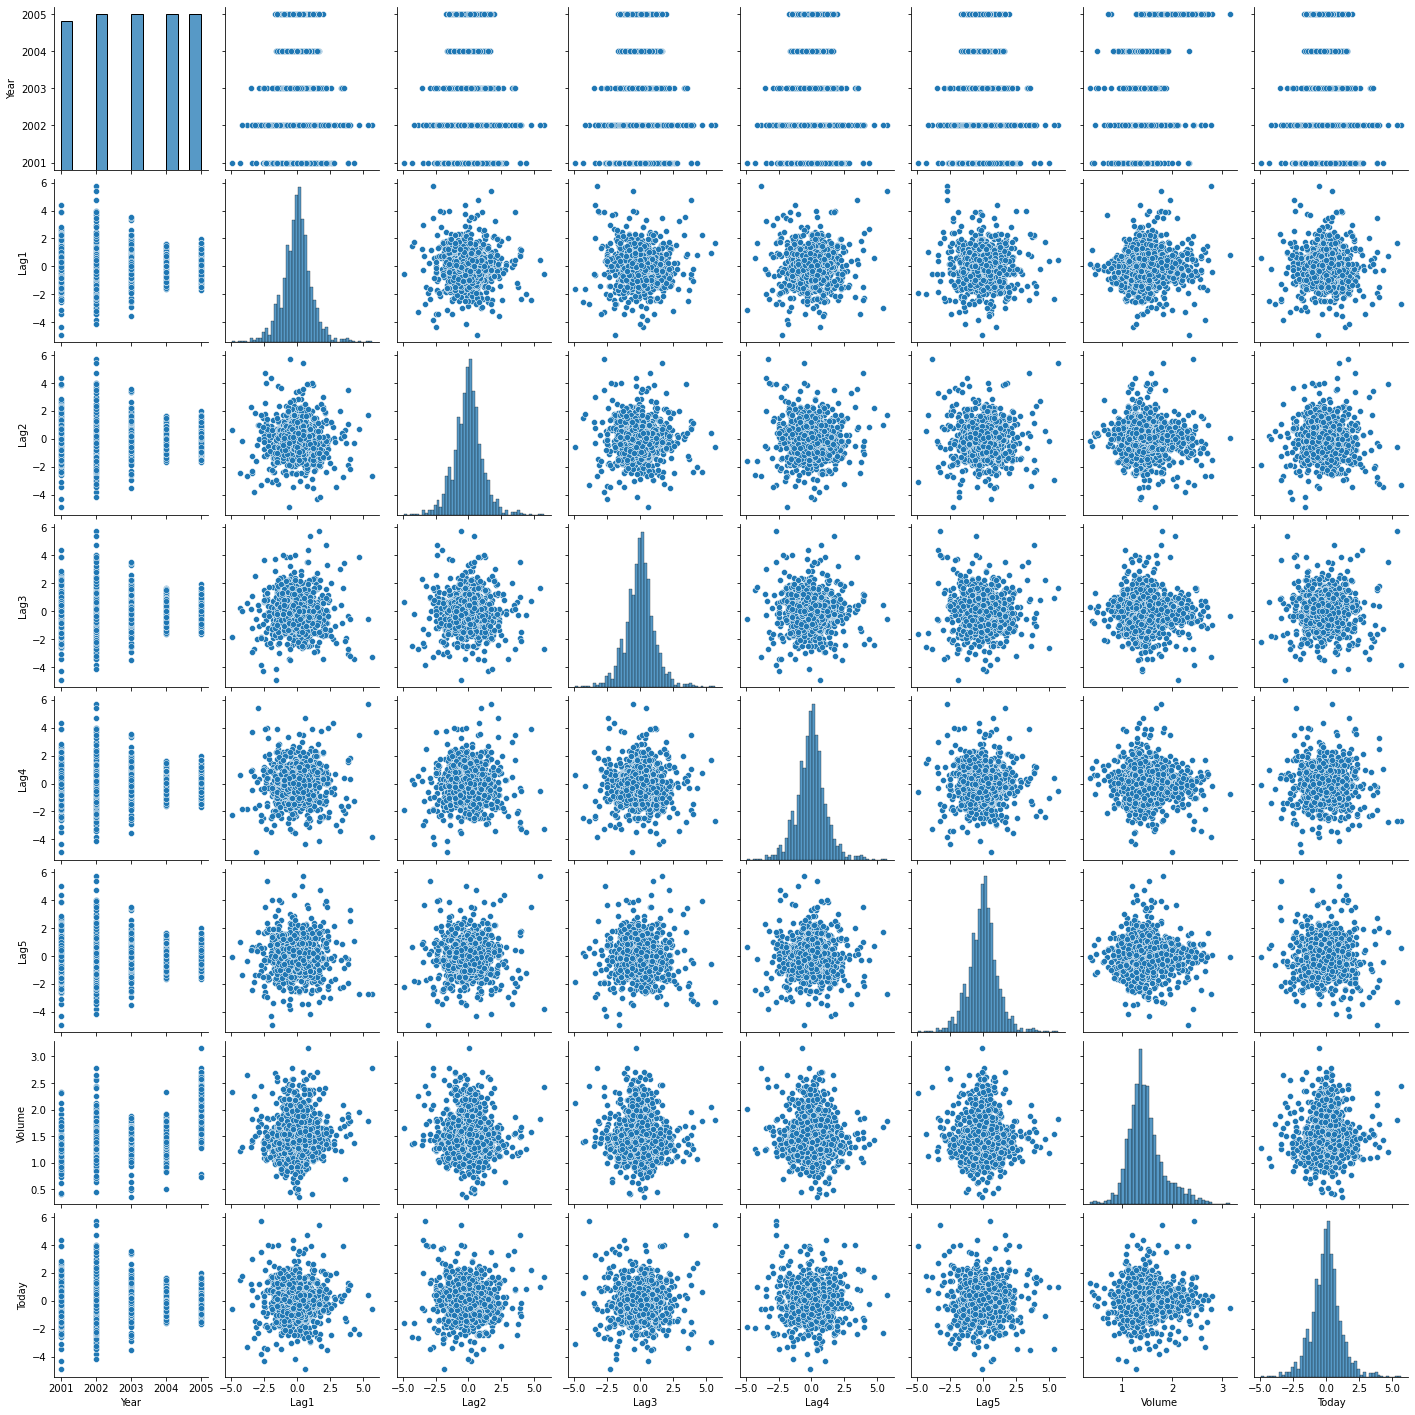

In [5]:
seabornInstance.pairplot(dataset)

In [6]:
dataset.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


In [7]:
for col in dataset.columns:
    globals()[col] = dataset[col]

In [8]:
x=globals()
print(x)

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'import pandas as pd  \nimport numpy as np  \nimport matplotlib.pyplot as plt  \nimport seaborn as seabornInstance \nfrom sklearn.model_selection import train_test_split \nfrom sklearn.linear_model import LinearRegression\nfrom sklearn import metrics\nimport statsmodels.api as sm\nfrom patsy import dmatrices\nimport random as rn\nimport seaborn as seabornInstance ', "dataset=pd.read_csv(r'C:\\Users\\divyansh\\Downloads\\archive\\smarket.csv')", "dataset=dataset.drop(['Unnamed: 0'],axis=1)", 'dataset.describe()', 'seabornInstance.pairplot(dataset)', 'dataset.corr()', 'for col in dataset.columns:\n    globals()[col] = dataset[col]', 'x=globals()\nprint(x)'], '_oh': {4:               Year         Lag1         Lag2         L

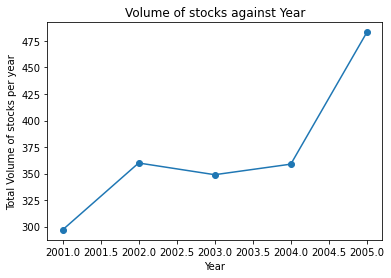

In [23]:

plt.plot(dataset.groupby('Year').sum().index, dataset.groupby('Year').sum()['Volume'], marker='o')
plt.title('Volume of stocks against Year')
plt.xlabel('Year')
plt.ylabel('Total Volume');

In [55]:

import statsmodels.formula.api as smf
model = smf.glm(formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=dataset, family=sm.families.Binomial())
res = model.fit()
print(res.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Thu, 06 May 2021   Deviance:                       1727.6
Time:                                          16:36:52   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [56]:
y,x=dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',data=dataset,return_type='dataframe')
print(y)

      Direction[Down]  Direction[Up]
0                 0.0            1.0
1                 0.0            1.0
2                 1.0            0.0
3                 0.0            1.0
4                 0.0            1.0
...               ...            ...
1245              0.0            1.0
1246              1.0            0.0
1247              0.0            1.0
1248              1.0            0.0
1249              1.0            0.0

[1250 rows x 2 columns]


In [57]:
model=sm.Logit(y['Direction[Up]'],x)
res2=model.fit()
print(res2.summary())

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:          Direction[Up]   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 May 2021   Pseudo R-squ.:                0.002074
Time:                        16:36:54   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

In [62]:
from sklearn.metrics import classification_report
print("Coefficeients")
print(res.params)
print()
print("p-Values")
print(res.pvalues)
print()
print("Dependent variables")
print(res.model.endog_names)
predictions = res.predict()
print(predictions[0:10])

Coefficeients
Intercept    0.126000
Lag1         0.073074
Lag2         0.042301
Lag3        -0.011085
Lag4        -0.009359
Lag5        -0.010313
Volume      -0.135441
dtype: float64

p-Values
Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

Dependent variables
['Direction[Down]', 'Direction[Up]']
[0.49291587 0.51853212 0.51886117 0.48477764 0.48921884 0.49304354
 0.50734913 0.49077084 0.48238647 0.51116222]


In [73]:
predictions = res.predict()
pred = []
for i in predictions:
    if(i<0.5):
        pred.append("Up")
    if(i>0.5):
        pred.append("Down")

In [74]:
data_confusion = {'y_real':dataset.Direction , 'y_pred':pred}
#print (data_confusion)
dataset_confusion= pd.DataFrame(data_confusion, columns=['y_real','y_pred'])
confusion_matrix = pd.crosstab(dataset_confusion['y_real'], dataset_confusion['y_pred'], rownames=['True'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  Down   Up
True                
Down        145  457
Up          141  507


In [77]:
training_data = dataset[dataset['Year'] < 2005]
test_data = dataset[dataset['Year'] == 2005]


In [78]:
model_new = smf.glm(formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=training_data, family=sm.families.Binomial())
res3 = model_new.fit()
print(res3.summary())

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                  998
Model:                                              GLM   Df Residuals:                      991
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -690.55
Date:                                  Thu, 06 May 2021   Deviance:                       1381.1
Time:                                          17:18:33   Pearson chi2:                     998.
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [80]:
predictions_new = res3.predict(test_data)
pred_new = []
for i in predictions_new:
    if(i<0.5):
        pred_new.append("Up")
    if(i>0.5):
        pred_new.append("Down")

In [87]:
data_confusion = {'y_real':test_data.Direction , 'y_pred':pred_new}
dataset_confusion= pd.DataFrame(data_confusion, columns=['y_real','y_pred'])
confusion_matrix = pd.crosstab(dataset_confusion['y_real'], dataset_confusion['y_pred'], rownames=['True'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  Down  Up
True               
Down         77  34
Up           97  44


In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [89]:
lda.fit(training_data[['Lag1','Lag2']], training_data['Direction'])
print('LDA weight coefficients : ', lda.coef_)
print('Prior group Possibilities : ', lda.priors_)
print('Group Means : \n', lda.means_)
print('Explained variance : ',lda.explained_variance_ratio_)

LDA weight coefficients :  [[-0.05544078 -0.0443452 ]]
Prior group Possibilities :  [0.49198397 0.50801603]
Group Means : 
 [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
Explained variance :  [1.]


In [90]:
predictions = lda.predict( test_data[['Lag1','Lag2']] )
data_confusion = {'y_real':test_data.Direction , 'y_pred':predictions}
dataset_confusion= pd.DataFrame(data_confusion, columns=['y_real','y_pred'])
confusion_matrix = pd.crosstab(dataset_confusion['y_real'], dataset_confusion['y_pred'], rownames=['True'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  Down   Up
True                
Down         35   76
Up           35  106


In [91]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

In [94]:
qda.fit(training_data[['Lag1','Lag2']], training_data['Direction'])
print('Prior group Possibilities : ', qda.priors_)
print('Group Means : \n', qda.means_)

Prior group Possibilities :  [0.49198397 0.50801603]
Group Means : 
 [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


In [95]:
predictions = qda.predict( test_data[['Lag1','Lag2']] )
data_confusion = {'y_real':test_data.Direction , 'y_pred':predictions}
dataset_confusion= pd.DataFrame(data_confusion, columns=['y_real','y_pred'])
confusion_matrix = pd.crosstab(dataset_confusion['y_real'], dataset_confusion['y_pred'], rownames=['True'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  Down   Up
True                
Down         30   81
Up           20  121


In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier(n_neighbors=1)

In [101]:
knn1.fit(training_data[['Lag1','Lag2']], training_data['Direction'])

KNeighborsClassifier(n_neighbors=1)

In [102]:
predictions = knn1.predict( test_data[['Lag1','Lag2']] )
data_confusion = {'y_real':test_data.Direction , 'y_pred':predictions}
dataset_confusion= pd.DataFrame(data_confusion, columns=['y_real','y_pred'])
confusion_matrix = pd.crosstab(dataset_confusion['y_real'], dataset_confusion['y_pred'], rownames=['True'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  Down  Up
True               
Down         43  68
Up           58  83


In [103]:
knn3=KNeighborsClassifier(n_neighbors=3)

In [104]:
knn3.fit(training_data[['Lag1','Lag2']], training_data['Direction'])

KNeighborsClassifier(n_neighbors=3)

In [105]:
predictions = knn3.predict( test_data[['Lag1','Lag2']] )
data_confusion = {'y_real':test_data.Direction , 'y_pred':predictions}
dataset_confusion= pd.DataFrame(data_confusion, columns=['y_real','y_pred'])
confusion_matrix = pd.crosstab(dataset_confusion['y_real'], dataset_confusion['y_pred'], rownames=['True'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  Down  Up
True               
Down         48  63
Up           55  86
